# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LIN\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (ty

In [2]:
y_train_label=np.loadtxt('label.txt',delimiter=",")
x_Train=np.loadtxt('feature.txt',delimiter=",")

In [3]:
y_test_label=np.loadtxt('test_label.txt',delimiter=",")
x_Test=np.loadtxt('test_feature.txt',delimiter=",")

In [4]:
print(y_train_label.shape)
print(x_Train.shape)

(590,)
(590, 1001)


In [5]:
print(y_test_label.shape)
print(x_Test.shape)

(540,)
(540, 1001)


In [17]:
x_Train_normalize=[]
for i in x_Train:
    new_i = i/i.max()
    x_Train_normalize.append(new_i)
x_Train_normalize=np.array(x_Train_normalize)

In [18]:
x_Test_normalize=[]
for i in x_Test:
    new_i = i/i.max()
    x_Test_normalize.append(new_i)
x_Test_normalize=np.array(x_Test_normalize)

In [19]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [20]:
print(x_Test_normalize.shape)
print(x_Train_normalize.shape)

(540, 1001)
(590, 1001)


In [21]:
print(y_Train_OneHot.shape)
print(y_Test_OneHot.shape)

(590, 2)
(540, 2)


In [22]:
y_Test_OneHot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# 建立模型

In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()

In [36]:
model.add(Dense(units=500, 
                input_dim=1001, 
                kernel_initializer='normal', 
                activation='relu'))

In [37]:
model.add(Dense(units=500, 
                kernel_initializer='normal', 
                activation='relu'))

In [38]:
model.add(Dense(units=2, 
                kernel_initializer='normal', 
                activation='softmax'))

In [39]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               501000    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 1002      
Total params: 752,502
Trainable params: 752,502
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [40]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [41]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 472 samples, validate on 118 samples
Epoch 1/10
 - 0s - loss: 0.9501 - acc: 0.5869 - val_loss: 1.9327 - val_acc: 0.8220
Epoch 2/10
 - 0s - loss: 3.2905e-04 - acc: 1.0000 - val_loss: 2.2108 - val_acc: 0.8220
Epoch 3/10
 - 0s - loss: 1.1552e-05 - acc: 1.0000 - val_loss: 2.3771 - val_acc: 0.8220
Epoch 4/10
 - 0s - loss: 2.4770e-06 - acc: 1.0000 - val_loss: 2.5119 - val_acc: 0.8220
Epoch 5/10
 - 0s - loss: 6.0039e-07 - acc: 1.0000 - val_loss: 2.6198 - val_acc: 0.8220
Epoch 6/10
 - 0s - loss: 2.6835e-07 - acc: 1.0000 - val_loss: 2.6858 - val_acc: 0.8220
Epoch 7/10
 - 0s - loss: 1.8721e-07 - acc: 1.0000 - val_loss: 2.7297 - val_acc: 0.8220
Epoch 8/10
 - 0s - loss: 1.4767e-07 - acc: 1.0000 - val_loss: 2.7507 - val_acc: 0.8220
Epoch 9/10
 - 0s - loss: 1.3442e-07 - acc: 1.0000 - val_loss: 2.7680 - val_acc: 0.8220
Epoch 10/10
 - 0s - loss: 1.2474e-07 - acc: 1.0000 - val_loss: 2.7784 - val_acc: 0.8220


# 以圖形顯示訓練過程

In [42]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

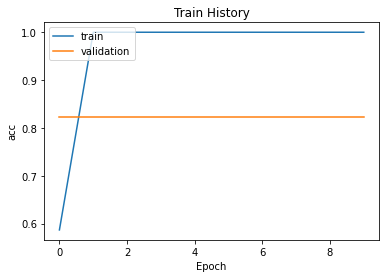

In [43]:
show_train_history(train_history,'acc','val_acc')

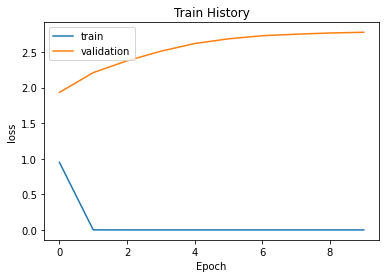

In [44]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [45]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

540/540 [==============================] - 0s 202us/step

accuracy= 0.9629629636252368


# 進行預測

In [46]:
prediction=model.predict_classes(x_Test)

In [47]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# confusion matrix

In [48]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0
label,
0.0,520
1.0,20


In [49]:
y_test_label

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.